In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Activation, BatchNormalization


### LOADING DATASET

In [3]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

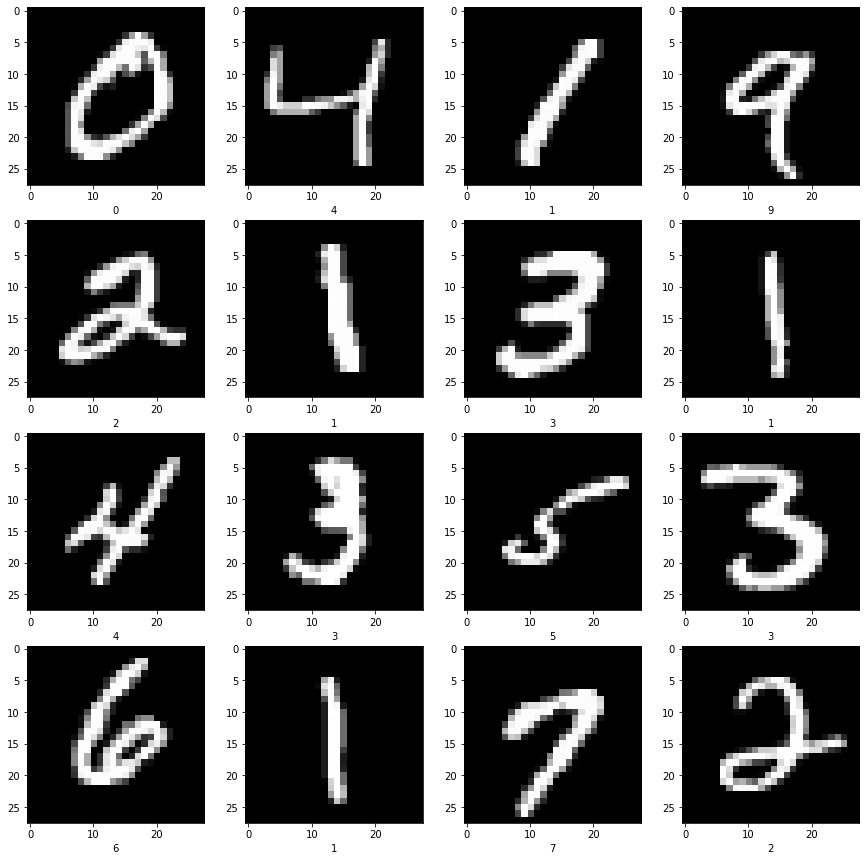

In [4]:
plt.figure(figsize=(15,15))
for i in range(1, 17):
    
    plt.subplot(4,4, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(str(Y_train[i]))
    # plt.xticks([])
    # plt.yticks([])

### DATA NORMALIZATION

In [5]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
X_train = X_train.reshape(len(X_train), 28*28)
X_test = X_test.reshape(len(X_test), 28*28)

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


### CREATING A NEURAL NETWORK

In [9]:
model = Sequential([
    Dense(20, activation='sigmoid', input_shape=(784,)),
    Dense(50, activation='sigmoid'),
    Dense(50, activation='sigmoid'),
    Dense(50, activation='sigmoid'),
    Dense(20, activation='sigmoid'),
    Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
h = model.fit(
    X_train, Y_train, validation_data=(X_test, Y_test), batch_size=100, epochs = 100, verbose=2
)

Epoch 1/100
600/600 - 4s - loss: 1.9369 - accuracy: 0.2801 - val_loss: 1.3411 - val_accuracy: 0.5463 - 4s/epoch - 6ms/step
Epoch 2/100
600/600 - 2s - loss: 0.9967 - accuracy: 0.6919 - val_loss: 0.7716 - val_accuracy: 0.7730 - 2s/epoch - 3ms/step
Epoch 3/100
600/600 - 2s - loss: 0.6052 - accuracy: 0.8531 - val_loss: 0.4920 - val_accuracy: 0.8853 - 2s/epoch - 3ms/step
Epoch 4/100
600/600 - 2s - loss: 0.4156 - accuracy: 0.8986 - val_loss: 0.3874 - val_accuracy: 0.9043 - 2s/epoch - 3ms/step
Epoch 5/100
600/600 - 2s - loss: 0.3414 - accuracy: 0.9137 - val_loss: 0.3387 - val_accuracy: 0.9141 - 2s/epoch - 3ms/step
Epoch 6/100
600/600 - 2s - loss: 0.2988 - accuracy: 0.9237 - val_loss: 0.3092 - val_accuracy: 0.9200 - 2s/epoch - 3ms/step
Epoch 7/100
600/600 - 2s - loss: 0.2674 - accuracy: 0.9314 - val_loss: 0.2850 - val_accuracy: 0.9256 - 2s/epoch - 3ms/step
Epoch 8/100
600/600 - 1s - loss: 0.2456 - accuracy: 0.9371 - val_loss: 0.2681 - val_accuracy: 0.9279 - 1s/epoch - 2ms/step
Epoch 9/100
600/

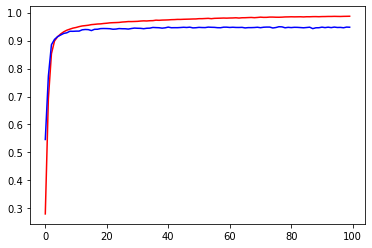

In [14]:
plt.plot(h.history['accuracy'], color='red')
plt.plot(h.history['val_accuracy'], color='blue')

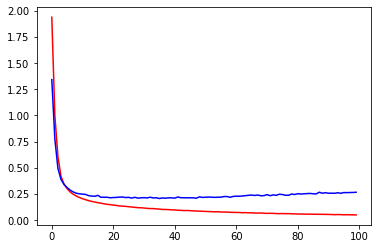

In [15]:
plt.plot(h.history['loss'], color='red')
plt.plot(h.history['val_loss'], color='blue')

### SAVING MODEL

In [16]:
model.save('MNIST.h5')